In [218]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [219]:
df_control = pd.read_csv('control_group.csv', delimiter=';')
df_test = pd.read_csv('test_group.csv', delimiter=';')

In [220]:
print("Nulls per column in control group:")
print(df_control.isnull().sum())
print("Number of elements in control group: " + str(df_control.shape[0]))
print("\nNulls per column in test group:")
print(df_test.isnull().sum())
print("Number of elements in test group: " + str(df_test.shape[0]))

Nulls per column in control group:
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64
Number of elements in control group: 30

Nulls per column in test group:
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64
Number of elements in test group: 30


In [221]:
null_rows = df_control[df_control.isnull().any(axis=1)]

print("Dates of rows with null values in control group:")
print(null_rows['Date'].unique())

Dates of rows with null values in control group:
['5.08.2019']


Since only 1 row has null values and we want to directly compare, we can just ignore that date from both dataframes.

In [222]:
df_control = df_control[df_control['Date'] != '5.08.2019']

df_test = df_test[df_test['Date'] != '5.08.2019']

In [223]:
print("Nulls per column in control group:")
print(df_control.isnull().sum())
print("Number of elements in control group: " + str(df_control.shape[0]))
print("\nNulls per column in test group:")
print(df_test.isnull().sum())
print("Number of elements in test group: " + str(df_test.shape[0]))

Nulls per column in control group:
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64
Number of elements in control group: 29

Nulls per column in test group:
Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64
Number of elements in test group: 29


In [224]:
# Only shows when rejecting the Null Hypothesis
def summarize_metric(metric, p):
    if(p >= 0.05):
        return
    control_mean = df_control[metric].dropna().mean()
    test_mean = df_test[metric].dropna().mean()

    uplift = ((test_mean - control_mean) / control_mean) * 100
    direction = '↑' if uplift > 0 else '↓' if uplift < 0 else '-'

    print(f"Direction :    {direction}")
    print(f"Uplift :       {uplift:.2f}%")

- Since sample size is less than 30, I am going to use t-tests instead of Z-tests.
- Tests will be done at the 95% confidence level as it strikes a practical balance between certainty and flexibility.
- H₀: There is **no significant difference** between the control group and the test group for the given metric.
- H₁: There **is a significant difference** between the control group and the test group for the given metric.

In [225]:
df_control['Date'] = pd.to_datetime(df_control['Date'], dayfirst=True)
df_test['Date'] = pd.to_datetime(df_test['Date'], dayfirst=True)
def show_metric(metric):
    plt.figure(figsize=(12, 5))

    control_daily_metric = df_control.groupby('Date')[metric].sum()
    test_daily_metric = df_test.groupby('Date')[metric].sum()

    plt.plot(control_daily_metric.index, control_daily_metric.values, label='Control', marker='o')
    plt.plot(test_daily_metric.index, test_daily_metric.values, label='Test', marker='x')

    plt.title(metric)
    plt.xlabel("Date")
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(f"Mean for control: {round(control_daily_metric.mean(), 2)}")
    print(f"Median for control: {round(control_daily_metric.median(), 2)}")
    print(f"Standard Deviation for control: {round(control_daily_metric.std(), 2)}")
    print(f"Mean for test: {round(test_daily_metric.mean(), 2)}")
    print(f"Median for test: {round(test_daily_metric.median(), 2)}")
    print(f"Standard Deviation for test: {round(test_daily_metric.std(), 2)}")
    print()
    stat, p_value = ttest_ind(df_test[metric], df_control[metric], equal_var=False)
    print(f"T-test p-value for {metric}: {p_value:.4f}")
    print("Significant Difference at the 95% confidence level") if p_value <= 0.05 else print("No Significant Difference at the 95% confidence level")
    summarize_metric(metric, p_value)

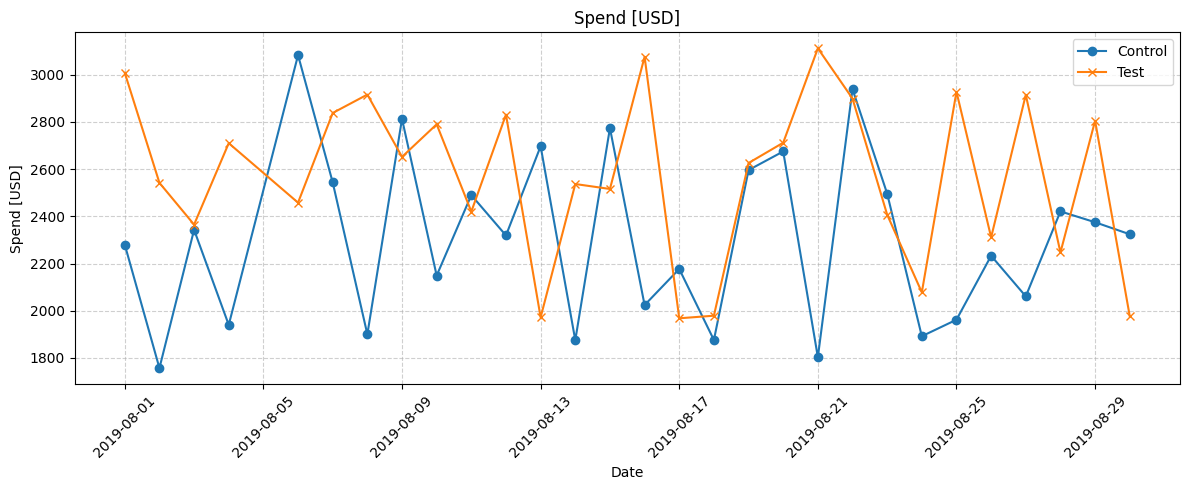

Mean for control: 2304.07
Median for control: 2319.0
Standard Deviation for control: 363.53
Mean for test: 2572.24
Median for test: 2626.0
Standard Deviation for test: 351.16

T-test p-value for Spend [USD]: 0.0060
Significant Difference at the 95% confidence level
Direction :    ↑
Uplift :       11.64%


In [226]:
show_metric('Spend [USD]')

While both groups exhibit fluctuations, the `Test` group generally shows higher daily spend and a higher overall mean spend compared to the `Control` group.

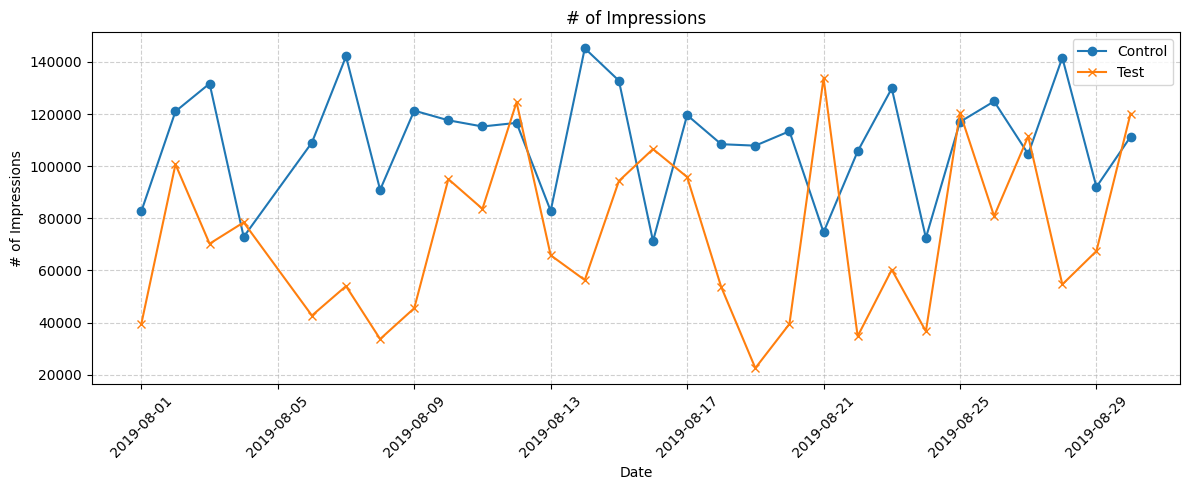

Mean for control: 109559.76
Median for control: 113430.0
Standard Deviation for control: 21688.92
Mean for test: 73215.48
Median for test: 67444.0
Standard Deviation for test: 31786.36

T-test p-value for # of Impressions: 0.0000
Significant Difference at the 95% confidence level
Direction :    ↓
Uplift :       -33.17%


In [227]:
show_metric('# of Impressions')

The `Control` group consistently shows a significantly higher number of impressions than the `Test` group throughout the period.

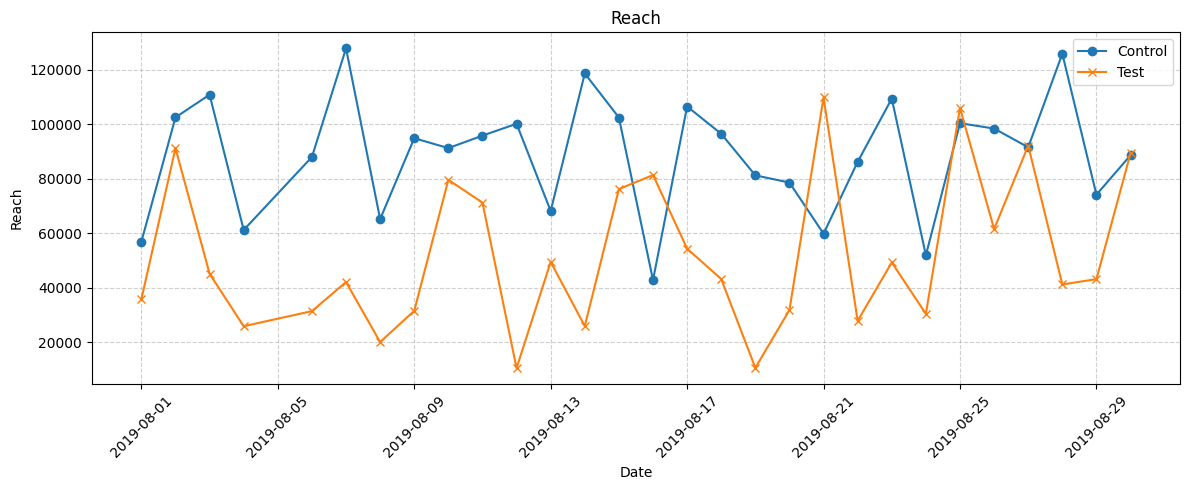

Mean for control: 88844.93
Median for control: 91579.0
Standard Deviation for control: 21832.35
Mean for test: 52055.48
Median for test: 43241.0
Standard Deviation for test: 28190.98

T-test p-value for Reach: 0.0000
Significant Difference at the 95% confidence level
Direction :    ↓
Uplift :       -41.41%


In [228]:
show_metric('Reach')

The `Control` group consistently exhibits a higher reach compared to the `Test` group throughout the observed period.

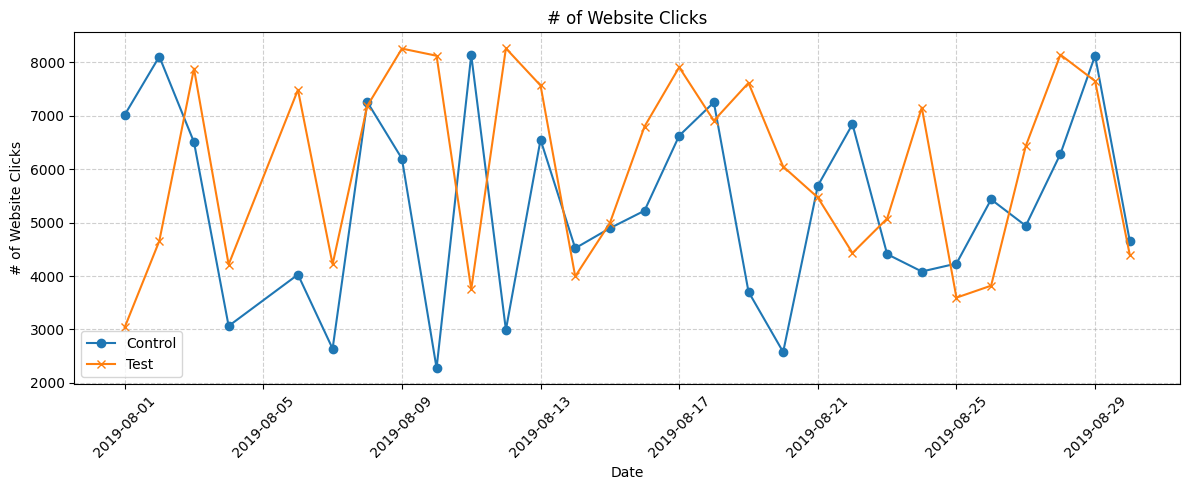

Mean for control: 5320.79
Median for control: 5224.0
Standard Deviation for control: 1757.37
Mean for test: 6038.17
Median for test: 6435.0
Standard Deviation for test: 1738.51

T-test p-value for # of Website Clicks: 0.1237
No Significant Difference at the 95% confidence level


In [229]:
show_metric('# of Website Clicks')

Performance for the number of Website Clicks has high volatility for both groups; additionally, the `Test` group generally recorded a higher number of daily website clicks compared to the `Control` group.

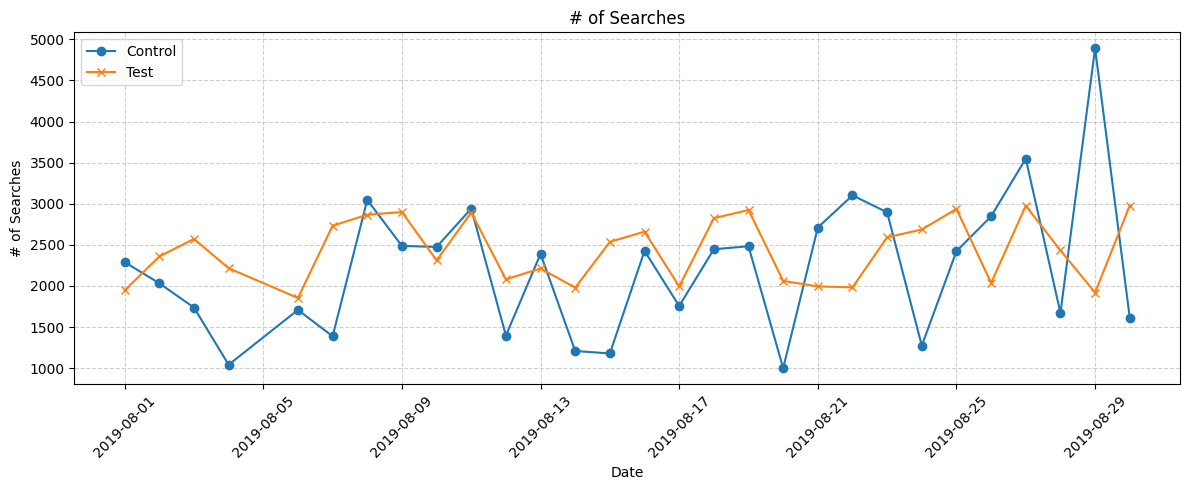

Mean for control: 2221.31
Median for control: 2390.0
Standard Deviation for control: 866.09
Mean for test: 2429.76
Median for test: 2432.0
Standard Deviation for test: 391.02

T-test p-value for # of Searches: 0.2447
No Significant Difference at the 95% confidence level


In [230]:
show_metric('# of Searches')

The `Control` group is far more stable than the `Test` group with neither group having a stable lead on the other.

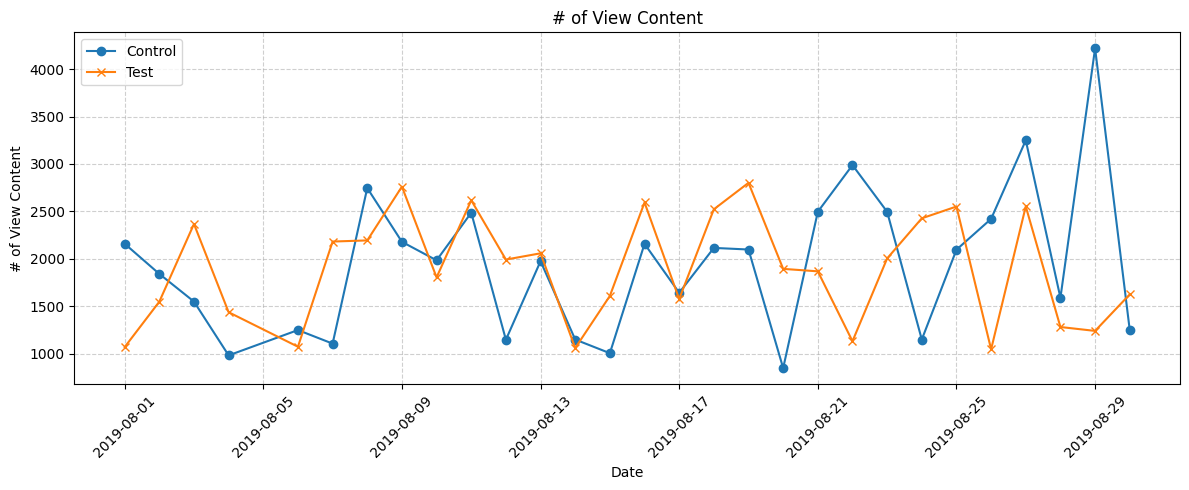

Mean for control: 1943.79
Median for control: 1984.0
Standard Deviation for control: 777.55
Mean for test: 1892.48
Median for test: 1894.0
Standard Deviation for test: 577.06

T-test p-value for # of View Content: 0.7765
No Significant Difference at the 95% confidence level


In [231]:
show_metric('# of View Content')

There is very mixed performance, with both performing roughly the same except for the massive surge towards the end of the month for the `Control` group, just like the surge in the `Control` group for `# of Searches`.

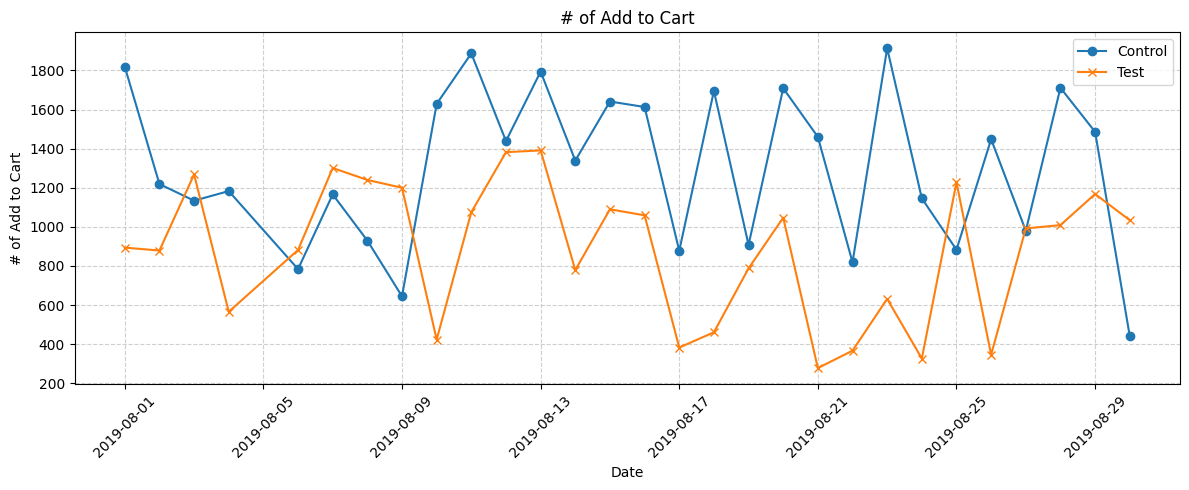

Mean for control: 1300.0
Median for control: 1339.0
Standard Deviation for control: 407.46
Mean for test: 878.97
Median for test: 992.0
Standard Deviation for test: 353.45

T-test p-value for # of Add to Cart: 0.0001
Significant Difference at the 95% confidence level
Direction :    ↓
Uplift :       -32.39%


In [232]:
show_metric('# of Add to Cart')

`Control` group generally dominates in this category; however, there is a sharp decline towards the end of the month.

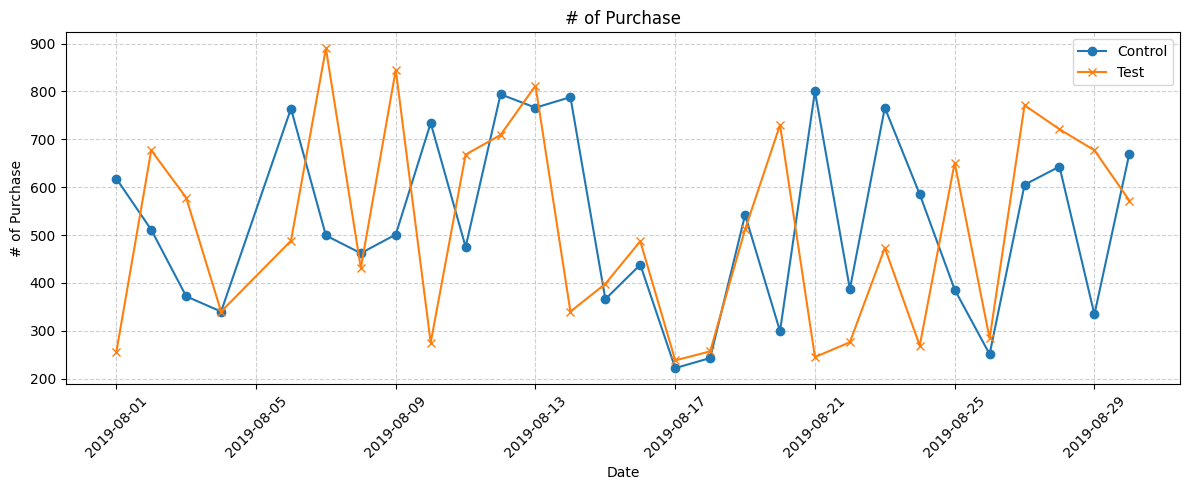

Mean for control: 522.79
Median for control: 501.0
Standard Deviation for control: 185.03
Mean for test: 512.72
Median for test: 488.0
Standard Deviation for test: 209.48

T-test p-value for # of Purchase: 0.8469
No Significant Difference at the 95% confidence level


In [233]:
show_metric('# of Purchase')

Both groups have high volatility and alternate leadership.

## 🧠 Key Takeaways

- Despite spending **11% more**, the test group had **33% fewer impressions**, **41% less reach** — indicating **worse exposure efficiency**.

- The **only behavioral metric** with a statistically significant change was **Add to Cart**, which **dropped by 32.4%**.

- **Purchases showed no significant difference**, meaning the **higher spend didn't translate into more sales**.